In [1]:
import torch

In [2]:
import torch.nn as nn

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
from sklearn import datasets

In [6]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [7]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [8]:
y = y.view(y.shape[0],1)

In [9]:
n_samples, n_features = X.shape

In [10]:
input_size = n_features
output_size = 1

# Model

model = nn.Linear(input_size, output_size)

In [11]:
# Loss and Optimizer
learning_rate = 0.02
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch: 1, loss = 5652.3745
epoch: 11, loss = 3113.0432
epoch: 21, loss = 1791.2234
epoch: 31, loss = 1100.1957
epoch: 41, loss = 737.6071
epoch: 51, loss = 546.7607
epoch: 61, loss = 446.0465
epoch: 71, loss = 392.7806
epoch: 81, loss = 364.5577
epoch: 91, loss = 349.5813


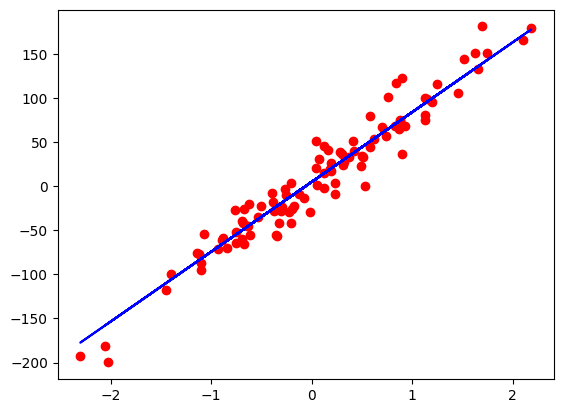

In [12]:
# Training
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    # Backward pass
    loss.backward()
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")
              
# plot
              
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()